# EDA and Data Visualization

While a more robust dashboard will be built in Tableau, we want to continue exploring data while visualizing relationships between features here in Python.

This notebook will be focused on trying to see patterns from player's previous seasons and current season, and their results. The goal for the machine learning of this project is to predict the next season fantasy points.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# bringing back in data frames ff_all and ff_collective

starter_df = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_starters_by_year.csv", index_col = 0)
ff_tall = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv", index_col = 0)

qb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)
rb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv", index_col = 0)
wr_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv", index_col = 0)
te_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv", index_col = 0)

## DataFrame explanation

starter_df contains the players that ranked as in the top 12 as a QB or TE, top 24 as an RB and top 36 as a WR, with a row for each season and each player. 

ff_tall contains players that played in at least 6 games each season AND also scored in the top 50% of all players over all seasons (~33 points). The purpose for these two are for more holistic data analysis and visualization of fantasy.

Each position 'wide' (i.e. rb_wide) contains a row per player that contains their stats from 2019 - 2022. The purpose of this DF is to model off of it and utilize a players previous year's stats to predict how they will do the following season.

In [117]:

pd.set_option('display.max_columns', None)
qb_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                              
AJ McCarron          346.0        NaN        NaN        NaN        NaN   
Aaron Rodgers        320.0      358.0      375.0      334.0        0.0   
Adrian Martinez        NaN        NaN        NaN        NaN        0.0   
Aidan O'Connell        NaN        NaN        NaN        NaN        0.0   
Alex McGough           NaN        NaN        NaN        NaN        0.0   

                 adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  age_2019  \
player_name                                                                   
AJ McCarron           NaN       NaN       NaN       NaN       NaN       NaN   
Aaron Rodgers        57.0      89.0      67.0      92.0       0.0      36.0   
Adrian Martinez       NaN       NaN       NaN       NaN       0.0       NaN   
Aidan O'Connell       NaN       NaN       NaN       NaN       0.0       NaN   
Alex McGough          NaN       NaN       NaN       NaN       0.0       NaN   

                 age_2020  age_2021  age_2022  age_2023  aggressiveness_2019  \
player_name                                                                    
AJ McCarron           NaN       NaN       NaN       NaN            16.666667   
Aaron Rodgers        37.0      38.0      39.0      40.0            13.803295   
Adrian Martinez       NaN       NaN       NaN       NaN                  NaN   
Aidan O'Connell       NaN       NaN       NaN       NaN                  NaN   
Alex McGough          NaN       NaN       NaN       NaN                  NaN   

                 aggressiveness_2020  aggressiveness_2021  \
player_name                                                 
AJ McCarron                      NaN                  NaN   
Aaron Rodgers              10.579508            16.516486   
Adrian Martinez                  NaN                  NaN   
Aidan O'Connell                  NaN                  NaN   
Alex McGough                     NaN                  NaN   

                 aggressiveness_2022  aggressiveness_2023  attempts_2019  \
player_name                                                                
AJ McCarron                      NaN                  NaN      36.000000   
Aaron Rodgers              15.095707                  0.0      66.941176   
Adrian Martinez                  NaN                  0.0            NaN   
Aidan O'Connell                  NaN                  0.0            NaN   
Alex McGough                     NaN                  0.0            NaN   

                 attempts_2020  attempts_2021  attempts_2022  attempts_2023  \
player_name                                                                   
AJ McCarron                NaN            NaN            NaN            NaN   
Aaron Rodgers        61.882353      62.470588      60.222222            0.0   
Adrian Martinez            NaN            NaN            NaN            0.0   
Aidan O'Connell            NaN            NaN            NaN            0.0   
Alex McGough               NaN            NaN            NaN            0.0   

                 avg_air_distance_2019  avg_air_distance_2020  \
player_name                                                     
AJ McCarron                  20.992778                    NaN   
Aaron Rodgers                23.003235              22.344334   
Adrian Martinez                    NaN                    NaN   
Aidan O'Connell                    NaN                    NaN   
Alex McGough                       NaN                    NaN   

                 avg_air_distance_2021  avg_air_distance_2022  \
player_name                                                     
AJ McCarron                        NaN                    NaN   
Aaron Rodgers                21.579879              21.550354   
Adrian Martinez                    NaN                    NaN   
Aidan O'Connell                    NaN                    NaN   
Alex McGough          

In [118]:
## Starter DF contains information on QBs that are 'starters' for each fantasy season

starter_df.head()

team     player_name position player_id_x  height  weight  years_exp   tm  \
0  BAL   Lamar Jackson       QB  00-0034796    74.0   212.0        1.0  BAL   
1  DAL    Dak Prescott       QB  00-0033077    74.0   238.0        3.0  DAL   
2  SEA  Russell Wilson       QB  00-0029263    71.0   215.0        7.0  SEA   
3  HOU  Deshaun Watson       QB  00-0033537    74.0   221.0        2.0  HOU   
4   TB  Jameis Winston       QB  00-0031503    76.0   231.0        4.0  TAM   

  pos   age     g    gs  tgt  rec  passingyds  passingtd  passingatt  \
0  QB  22.0  15.0  15.0  0.0  0.0      3127.0       36.0       401.0   
1  QB  26.0  16.0  16.0  0.0  0.0      4902.0       30.0       596.0   
2  QB  31.0  16.0  16.0  0.0  0.0      4110.0       31.0       516.0   
3  QB  24.0  15.0  15.0  1.0  1.0      3852.0       26.0       495.0   
4  QB  25.0  16.0  16.0  0.0  0.0      5109.0       33.0       626.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
0      1206.0        7.0       176.0           0.0          0.0   
1       277.0        3.0        52.0           0.0          0.0   
2       342.0        3.0        75.0           0.0          0.0   
3       413.0        7.0        82.0           6.0          1.0   
4       250.0        1.0        59.0           0.0          0.0   

   fantasypoints   int  fumbles  fumbleslost    adp            name  season_x  \
0         415.68   6.0      9.0          2.0   98.0   Lamar Jackson    2019.0   
1         335.78  11.0      6.0          2.0  131.0    Dak Prescott    2019.0   
2         326.60   5.0      8.0          2.0   93.0  Russell Wilson    2019.0   
3         318.98  12.0     10.0          3.0   48.0  Deshaun Watson    2019.0   
4         297.36  30.0     12.0          5.0  111.0  Jameis Winston    2019.0   

      full_name_x  season_y club_code  depth_team depth_lvl   gsis_id_x  \
0   Lamar Jackson    2019.0       BAL         1.0   starter  00-0034796   
1    Dak Prescott    2019.0       DAL         1.0   starter  00-0033077   
2  Russell Wilson    2019.0       SEA         1.0   starter  00-0029263   
3  Deshaun Watson    2019.0       HOU         1.0   starter  00-0033537   
4  Jameis Winston    2019.0        TB         1.0   starter  00-0031503   

  depth_position  cmp  ppr  dkpt  fdpt  vbd  season player_display_name  \
0             QB  NaN  NaN   NaN   NaN  NaN  2019.0       Lamar Jackson   
1             QB  NaN  NaN   NaN   NaN  NaN  2019.0        Dak Prescott   
2             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Russell Wilson   
3             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Deshaun Watson   
4             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Jameis Winston   

  player_gsis_id_x  avg_time_to_throw  avg_completed_air_yards  \
0       00-0034796           2.943613                 6.721439   
1       00-0033077           2.863889                 7.383088   
2       00-0029263           2.857214                 6.919418   
3       00-0033537           2.811673                 6.598724   
4       00-0031503           2.773831                 8.317304   

   avg_intended_air_yards  avg_air_yards_differential  aggressiveness  \
0                8.814669                   -2.093231       14.902159   
1                9.074466                   -1.691378       17.214539   
2                9.558971                   -2.639553       19.070277   
3                8.822830                   -2.224106       15.675721   
4               10.508673                   -2.191370       17.202558   

   max_completed_air_distance  avg_air_yards_to_sticks   attempts  pass_yards  \
0                   38.032465                 0.242468  50.125000  390.875000   
1                   41.775767                 0.210847  70.117647  576.705882   
2                   43.704954                 0.181699  60.470588  481.411765   
3                   43.954208                 0.144872  61.875000  481.500000   
4                   43.811773                 1.330559  73.52

In [119]:
# let's create lists of column names to easily see things we'd like to see in dataframes

scoring_by_year = ['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020',
                   'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

In [120]:
ff_tall.head()

team       player_name position player_id_x  height  weight  years_exp   tm  \
0  ARI      Kyler Murray       QB  00-0035228    70.0   207.0        0.0  ARI   
1  ARI     David Johnson       RB  00-0032187    73.0   224.0        4.0  ARI   
2  ARI      Kenyan Drake       RB  00-0033118    73.0   211.0        3.0  2TM   
5  ARI  Larry Fitzgerald       WR  00-0022921    75.0   218.0       15.0  ARI   
8  ARI    Christian Kirk       WR  00-0034775    71.0   200.0        1.0  ARI   

  pos   age     g    gs    tgt   rec  passingyds  passingtd  passingatt  \
0  QB  22.0  16.0  16.0    0.0   0.0      3722.0       20.0       542.0   
1  RB  28.0  13.0   9.0   47.0  36.0         0.0        0.0         0.0   
2  RB  25.0  14.0  10.0   68.0  50.0         0.0        0.0         0.0   
5  WR  36.0  16.0  16.0  109.0  75.0         0.0        0.0         0.0   
8  WR  23.0  13.0  13.0  108.0  68.0         0.0        0.0         0.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
0       544.0        4.0        93.0           0.0          0.0   
1       345.0        2.0        94.0         370.0          4.0   
2       817.0        8.0       170.0         345.0          0.0   
5         0.0        0.0         0.0         804.0          4.0   
8        93.0        0.0        10.0         709.0          3.0   

   fantasypoints   int  fumbles  fumbleslost    adp              name  \
0         279.28  12.0      5.0          2.0  114.0      Kyler Murray   
1         141.50   0.0      1.0          1.0    5.0     David Johnson   
2         212.20   0.0      2.0          1.0   89.0      Kenyan Drake   
5         177.40   0.0      1.0          1.0  116.0  Larry Fitzgerald   
8         166.20   0.0      0.0          0.0   91.0    Christian Kirk   

   season_x       full_name_x  season_y club_code  depth_team depth_lvl  \
0    2019.0      Kyler Murray    2019.0       ARI         1.0   starter   
1    2019.0     David Johnson    2019.0       ARI         1.0   starter   
2    2019.0      Kenyan Drake    2019.0       MIA         1.0   starter   
5    2019.0  Larry Fitzgerald    2019.0       ARI         1.0   starter   
8    2019.0    Christian Kirk    2019.0       ARI         1.0   starter   

    gsis_id_x depth_position  cmp  ppr  dkpt  fdpt  vbd  season  \
0  00-0035228             QB  NaN  NaN   NaN   NaN  NaN  2019.0   
1  00-0032187             RB  NaN  NaN   NaN   NaN  NaN  2019.0   
2  00-0033118             RB  NaN  NaN   NaN   NaN  NaN  2019.0   
5  00-0022921             WR  NaN  NaN   NaN   NaN  NaN  2019.0   
8  00-0034775             PR  NaN  NaN   NaN   NaN  NaN  2019.0   

  player_display_name player_gsis_id_x  avg_time_to_throw  \
0        Kyler Murray       00-0035228           2.733681   
1       David Johnson              NaN                NaN   
2        Kenyan Drake              NaN                NaN   
5    Larry Fitzgerald              NaN                NaN   
8      Christian Kirk              NaN                NaN   

   avg_completed_air_yards  avg_intended_air_yards  \
0                 4.914236                6.850385   
1                      NaN                     NaN   
2                      NaN                     NaN   
5                      NaN                7.479945   
8                      NaN                9.355936   

   avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
0                   -1.936149       13.732432                    38.64734   
1                         NaN             NaN                         NaN   
2                         NaN             NaN                         NaN   
5                         NaN             NaN                         NaN   
8                         NaN             NaN                         NaN   

   avg_air_yards_to_sticks   attempts  pass_yards  pass_touchdowns  \
0                -2.111357  63.764706  437.882353         2.352941   
1                      NaN        NaN         NaN              NaN   
2  

### Scoring and positions as a whole

In [121]:
pd.set_option('display.max_columns', None)
starter_df.head()

team     player_name position player_id_x  height  weight  years_exp   tm  \
0  BAL   Lamar Jackson       QB  00-0034796    74.0   212.0        1.0  BAL   
1  DAL    Dak Prescott       QB  00-0033077    74.0   238.0        3.0  DAL   
2  SEA  Russell Wilson       QB  00-0029263    71.0   215.0        7.0  SEA   
3  HOU  Deshaun Watson       QB  00-0033537    74.0   221.0        2.0  HOU   
4   TB  Jameis Winston       QB  00-0031503    76.0   231.0        4.0  TAM   

  pos   age     g    gs  tgt  rec  passingyds  passingtd  passingatt  \
0  QB  22.0  15.0  15.0  0.0  0.0      3127.0       36.0       401.0   
1  QB  26.0  16.0  16.0  0.0  0.0      4902.0       30.0       596.0   
2  QB  31.0  16.0  16.0  0.0  0.0      4110.0       31.0       516.0   
3  QB  24.0  15.0  15.0  1.0  1.0      3852.0       26.0       495.0   
4  QB  25.0  16.0  16.0  0.0  0.0      5109.0       33.0       626.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
0      1206.0        7.0       176.0           0.0          0.0   
1       277.0        3.0        52.0           0.0          0.0   
2       342.0        3.0        75.0           0.0          0.0   
3       413.0        7.0        82.0           6.0          1.0   
4       250.0        1.0        59.0           0.0          0.0   

   fantasypoints   int  fumbles  fumbleslost    adp            name  season_x  \
0         415.68   6.0      9.0          2.0   98.0   Lamar Jackson    2019.0   
1         335.78  11.0      6.0          2.0  131.0    Dak Prescott    2019.0   
2         326.60   5.0      8.0          2.0   93.0  Russell Wilson    2019.0   
3         318.98  12.0     10.0          3.0   48.0  Deshaun Watson    2019.0   
4         297.36  30.0     12.0          5.0  111.0  Jameis Winston    2019.0   

      full_name_x  season_y club_code  depth_team depth_lvl   gsis_id_x  \
0   Lamar Jackson    2019.0       BAL         1.0   starter  00-0034796   
1    Dak Prescott    2019.0       DAL         1.0   starter  00-0033077   
2  Russell Wilson    2019.0       SEA         1.0   starter  00-0029263   
3  Deshaun Watson    2019.0       HOU         1.0   starter  00-0033537   
4  Jameis Winston    2019.0        TB         1.0   starter  00-0031503   

  depth_position  cmp  ppr  dkpt  fdpt  vbd  season player_display_name  \
0             QB  NaN  NaN   NaN   NaN  NaN  2019.0       Lamar Jackson   
1             QB  NaN  NaN   NaN   NaN  NaN  2019.0        Dak Prescott   
2             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Russell Wilson   
3             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Deshaun Watson   
4             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Jameis Winston   

  player_gsis_id_x  avg_time_to_throw  avg_completed_air_yards  \
0       00-0034796           2.943613                 6.721439   
1       00-0033077           2.863889                 7.383088   
2       00-0029263           2.857214                 6.919418   
3       00-0033537           2.811673                 6.598724   
4       00-0031503           2.773831                 8.317304   

   avg_intended_air_yards  avg_air_yards_differential  aggressiveness  \
0                8.814669                   -2.093231       14.902159   
1                9.074466                   -1.691378       17.214539   
2                9.558971                   -2.639553       19.070277   
3                8.822830                   -2.224106       15.675721   
4               10.508673                   -2.191370       17.202558   

   max_completed_air_distance  avg_air_yards_to_sticks   attempts  pass_yards  \
0                   38.032465                 0.242468  50.125000  390.875000   
1                   41.775767                 0.210847  70.117647  576.705882   
2                   43.704954                 0.181699  60.470588  481.411765   
3                   43.954208                 0.144872  61.875000  481.500000   
4                   43.811773                 1.330559  73.52

In [122]:
starter_df.describe()

height      weight   years_exp         age           g          gs  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean    73.214286  216.452381    3.928571   26.130952   15.434524   13.627976   
std      2.703547   21.105650    3.465086    3.666809    1.448169    3.430546   
min     67.000000  165.000000    0.000000   21.000000    8.000000    0.000000   
25%     71.000000  203.000000    2.000000   24.000000   15.000000   12.000000   
50%     73.000000  215.000000    3.000000   26.000000   16.000000   15.000000   
75%     76.000000  228.000000    5.000000   27.000000   16.000000   16.000000   
max     79.000000  265.000000   22.000000   45.000000   17.000000   17.000000   

              tgt         rec   passingyds   passingtd  passingatt  \
count  336.000000  336.000000   336.000000  336.000000  336.000000   
mean    82.779762   57.205357   603.264881    4.389881   80.285714   
std     48.842840   33.006414  1493.155782   11.033453  198.992166   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%     49.000000   36.750000     0.000000    0.000000    0.000000   
50%     89.000000   61.000000     0.000000    0.000000    0.000000   
75%    119.000000   79.000000     0.000000    0.000000    1.000000   
max    191.000000  149.000000  5316.000000   48.000000  733.000000   

        rushingyds   rushingtd  rushingatt  receivingyds  receivingtd  \
count   336.000000  336.000000  336.000000    336.000000   336.000000   
mean    340.607143    3.020833   73.696429    663.592262     4.366071   
std     461.096235    4.296772   99.364113    448.033431     3.586864   
min     -11.000000    0.000000    0.000000    -10.000000     0.000000   
25%       0.000000    0.000000    1.000000    292.250000     1.000000   
50%      41.500000    0.000000    7.000000    722.500000     4.000000   
75%     764.000000    6.000000  160.500000   1026.750000     7.000000   
max    2027.000000   18.000000  378.000000   1947.000000    18.000000   

       fantasypoints         int     fumbles  fumbleslost         adp  \
count     336.000000  336.000000  336.000000   336.000000  284.000000   
mean      196.392321    1.491071    2.282738     1.116071   61.158451   
std        76.606445    3.982039    2.954450     1.395594   46.329129   
min        80.000000    0.000000    0.000000     0.000000    1.000000   
25%       137.975000    0.000000    0.000000     0.000000   23.750000   
50%       180.000000    0.000000    1.000000     1.000000   51.500000   
75%       242.250000    0.000000    3.000000     2.000000   89.000000   
max       469.200000   30.000000   16.000000     9.000000  198.000000   

          season_x     season_y  depth_team         cmp         ppr  \
count   336.000000   333.000000  333.000000   84.000000   84.000000   
mean   2020.500000  2020.501502    1.165165   54.630952  237.475000   
std       1.119701     1.118370    0.438769  137.626155   66.170309   
min    2019.000000  2019.000000    1.000000    0.000000  134.800000   
25%    2019.750000  2020.000000    1.000000    0.000000  185.675000   
50%    2020.500000  2021.000000    1.000000    0.000000  224.450000   
75%    2021.250000  2021.000000    1.000000    0.000000  284.075000   
max    2022.000000  2022.000000    3.000000  490.000000  417.400000   

             dkpt        fdpt         vbd     season  avg_time_to_throw  \
count   84.000000   84.000000   67.000000   420.0000          48.000000   
mean   244.379762  210.189286   47.537313  2021.0000           2.799211   
std     69.154268   71.996181   39.251840     1.4159           0.142525   
min    137.800000  113.000000    1.000000  2019.0000           2.442485   
25%    189.925000  158.450000   16.500000  2020.0000           2.731546   
50%    229.650000  189.750000   37.000000  2021.0000           2.811296   
75%    298.800000  261.625000   71.500000  2022.0000           2.882634   
max    435.400000  428.900000  136.000000  2023.0000           3.139329   

       avg_complet

## Each position, year over year

### QBs

In [123]:
qb_wide.shape

(150, 570)

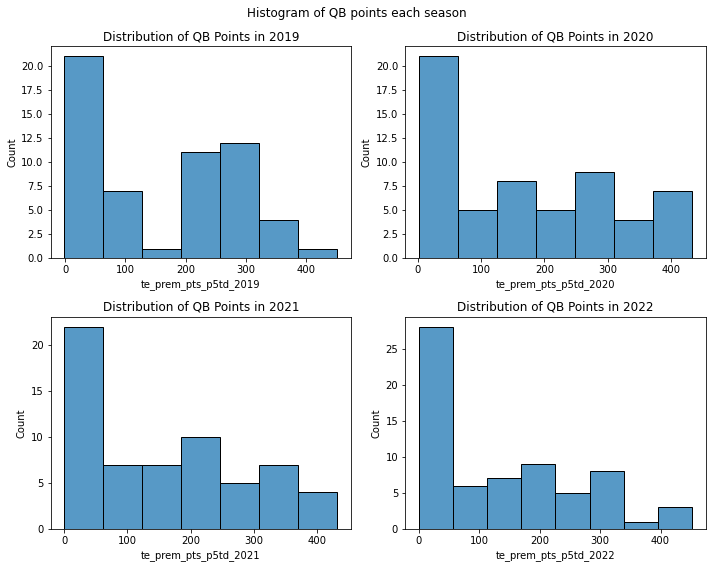

In [124]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of QB points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= qb_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of QB Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [125]:
# because of nature of the data, let's see how many are null as well

qb_wide[scoring_by_year].isna().sum()

te_prem_pts_p5td_2019    93
te_prem_pts_p5td_2020    91
te_prem_pts_p5td_2021    88
te_prem_pts_p5td_2022    83
dtype: int64

In [126]:
# can we cut this data down to a relevant top percentile?

qb_wide[scoring_by_year].quantile([.25, .33, .4, .5, .6, .67,.7, .75, .8])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.25                35.5000                28.5500                35.5900   
0.33                59.5896                58.6272                54.1470   
0.40                84.5720                84.9000                86.0800   
0.50               185.5600               144.4600               132.6000   
0.60               234.2600               188.5600               194.5120   
0.67               250.5216               251.3164               233.8354   
0.70               257.0920               260.3680               240.7520   
0.75               268.4200               277.3400               250.3600   
0.80               282.6080               300.8480               280.8080   

      te_prem_pts_p5td_2022  
0.25                22.3300  
0.33                41.7340  
0.40                51.3480  
0.50               104.4200  
0.60               162.7120  
0.67               183.8752  
0.70               198.5200  
0.75               231.4300  
0.80               254.9520

Based on how many rows and then nulls, seems there are anywhere from 113 - 130 qbs per season that are in here.

We can definitely trim this down. Let's take, about the top 2/3s -- that is, they have to be about in the top  fantasy pts scored at least for one of these seasons to be eligible.

In [128]:
# let's filter out QBs a bit further

# because of nature of the data, let's see how many are null as well


qb_filtered = qb_wide.loc[(qb_wide['te_prem_pts_p5td_2019'] >= qb_wide[scoring_by_year].quantile(.33)[0] )|
                          (qb_wide['te_prem_pts_p5td_2020'] >= qb_wide[scoring_by_year].quantile(.33)[1]) |
                          (qb_wide['te_prem_pts_p5td_2021'] >= qb_wide[scoring_by_year].quantile(.33)[2]) |  
                          (qb_wide['te_prem_pts_p5td_2022'] >= qb_wide[scoring_by_year].quantile(.33)[3]) ] 

In [129]:
qb_filtered[['pts_scored_last_yr_tm_stat_2023', 'te_prem_pts_p5td_2022']].head(20)

pts_scored_last_yr_tm_stat_2023  te_prem_pts_p5td_2022
player_name                                                               
Aaron Rodgers                                 296.0                 261.20
Alex Smith                                      NaN                    NaN
Andy Dalton                                   347.0                 190.24
Bailey Zappe                                  364.0                  44.14
Baker Mayfield                                313.0                 131.42
Ben Roethlisberger                              NaN                    NaN
Brock Purdy                                   450.0                 119.26
Cam Newton                                      NaN                    NaN
Carson Wentz                                    NaN                 119.80
Case Keenum                                   289.0                    NaN
Cooper Rush                                   467.0                  61.64
Dak Prescott                                  467.0                 221.60
Daniel Jones                                  365.0                 300.00
Davis Mills                                   289.0                 196.52
Derek Carr                                    330.0                 243.08
Deshaun Watson                                361.0                  92.58
Drew Brees                                      NaN                    NaN
Drew Lock                                     407.0                    NaN
Dwayne Haskins                                  NaN                    NaN
Eli Manning                                     NaN                    NaN

In [130]:
print('nulls of qb_filtered now: ', 
      qb_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum(),
     'Shape of qb_filtered: ',
     qb_filtered.shape)

nulls of qb_filtered now:  te_prem_pts_p5td_2019    25
te_prem_pts_p5td_2020    21
te_prem_pts_p5td_2021    15
te_prem_pts_p5td_2022    16
dtype: int64 Shape of qb_filtered:  (66, 570)


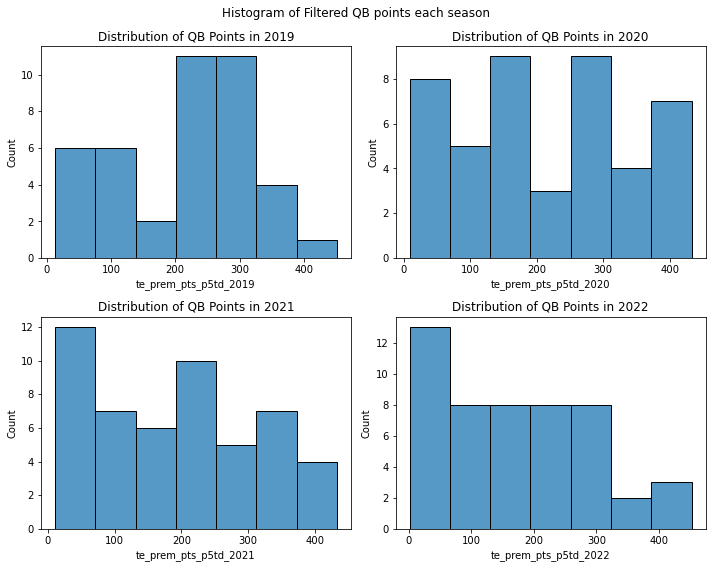

In [131]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of Filtered QB points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of QB Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

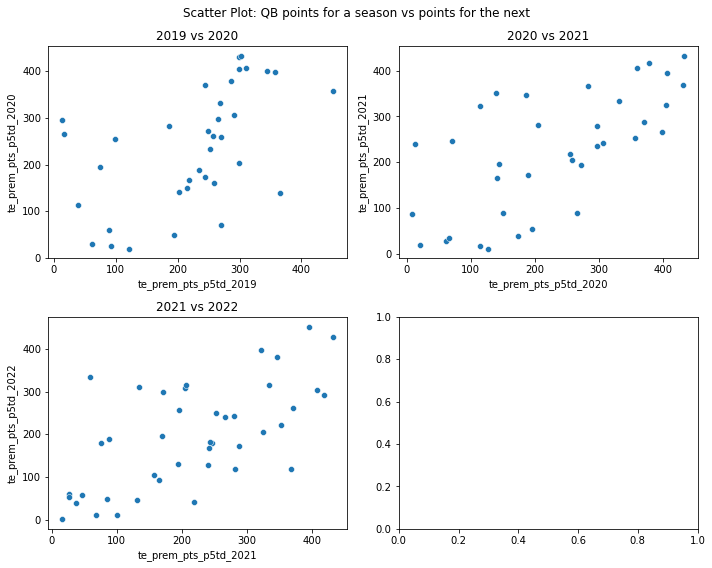

In [132]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: QB points for a season vs points for the next')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

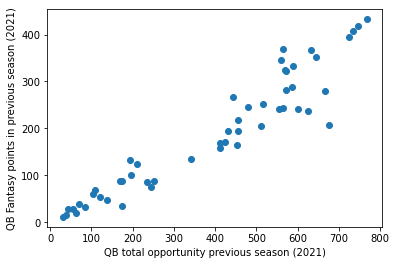

In [133]:
plt.scatter(qb_filtered['ttl_opp_2021'], qb_filtered['te_prem_pts_p5td_2021'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in previous season (2021)')

plt.show()

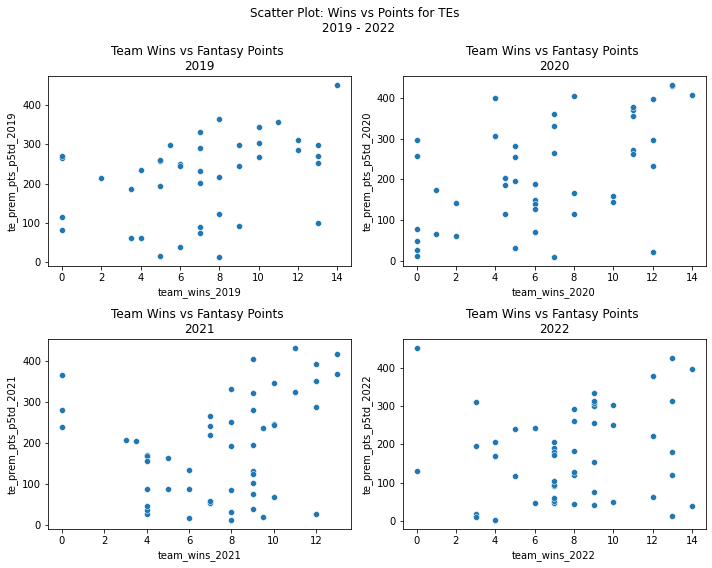

In [134]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Wins vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'team_wins_{year}', y=f'te_prem_pts_p5td_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Wins vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

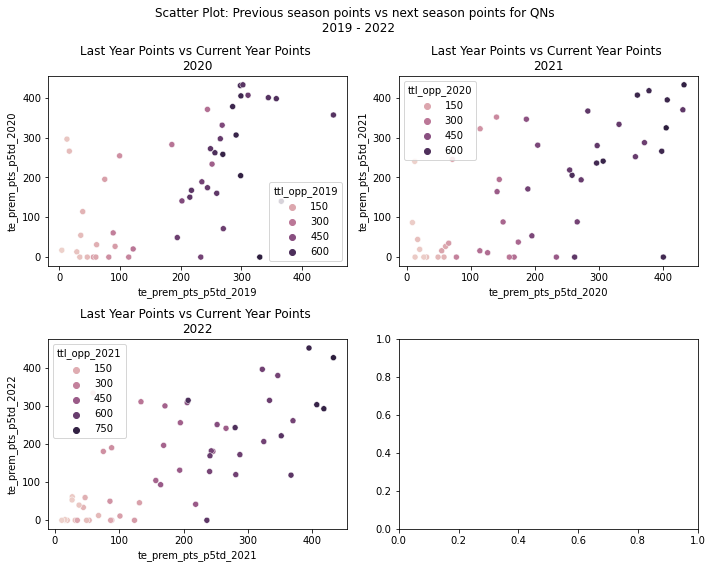

In [84]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Previous season points vs next season points for QNs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', hue = f'ttl_opp_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Last Year Points vs Current Year Points \n{next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

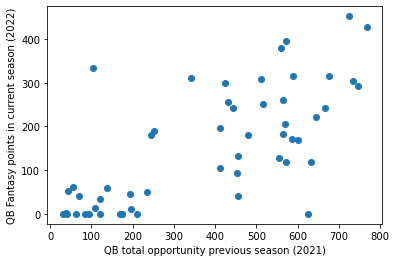

In [85]:
# how does previous amount of touches in previous year reflect next year's points?

plt.scatter(qb_filtered['ttl_opp_2021'], qb_filtered['te_prem_pts_p5td_2022'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in current season (2022)')

plt.show()

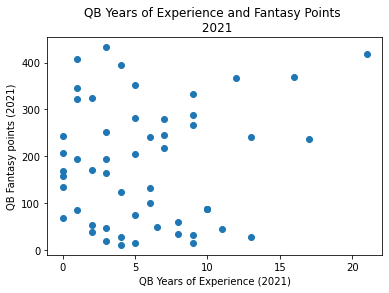

In [86]:
plt.scatter(qb_filtered['years_exp_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('QB Years of Experience (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('QB Years of Experience and Fantasy Points \n 2021')

plt.show()

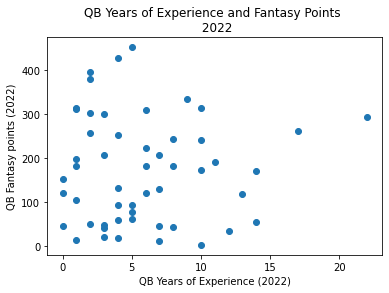

In [87]:
plt.scatter(qb_filtered['years_exp_2022'], qb_filtered['te_prem_pts_p5td_2022'] )
plt.xlabel('QB Years of Experience (2022)')
plt.ylabel('QB Fantasy points (2022)')
plt.title('QB Years of Experience and Fantasy Points \n 2022')

plt.show()

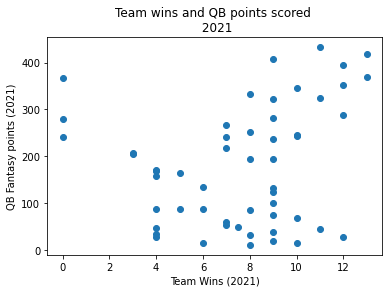

In [88]:
plt.scatter(qb_filtered['wins_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('Team Wins (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('Team wins and QB points scored \n 2021')

plt.show()

<AxesSubplot:>

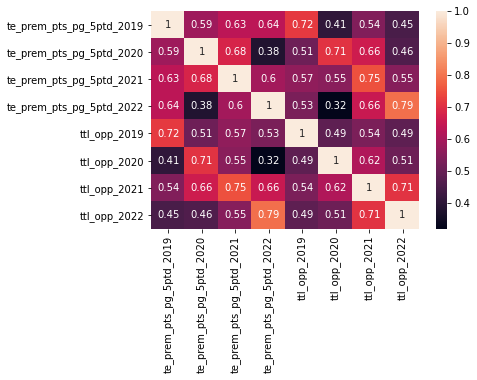

In [90]:
# let's check correlation between a few of these

sns.heatmap(qb_filtered[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021'\
                     , 'te_prem_pts_pg_5ptd_2022', 'ttl_opp_2019','ttl_opp_2020', 'ttl_opp_2021', 'ttl_opp_2022']]\
            .corr(), annot = True)

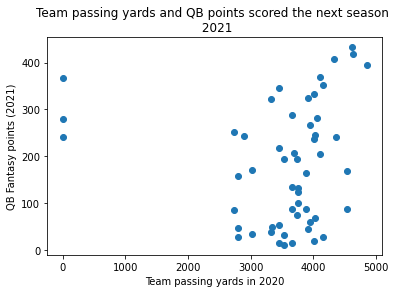

In [91]:
plt.scatter(qb_filtered['passy_last_yr_tm_stat_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('Team passing yards in 2020')
plt.ylabel('QB Fantasy points (2021)')
plt.title('Team passing yards and QB points scored the next season \n 2021')

plt.show()

<AxesSubplot:>

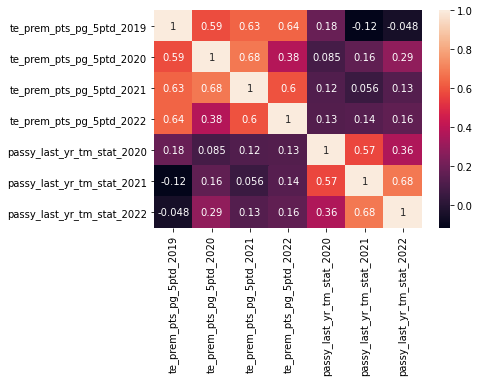

In [92]:
# let's check correlation between a few of these

sns.heatmap(qb_filtered[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021'\
                     , 'te_prem_pts_pg_5ptd_2022', 'passy_last_yr_tm_stat_2020','passy_last_yr_tm_stat_2021', 'passy_last_yr_tm_stat_2022']]\
            .corr(), annot = True)

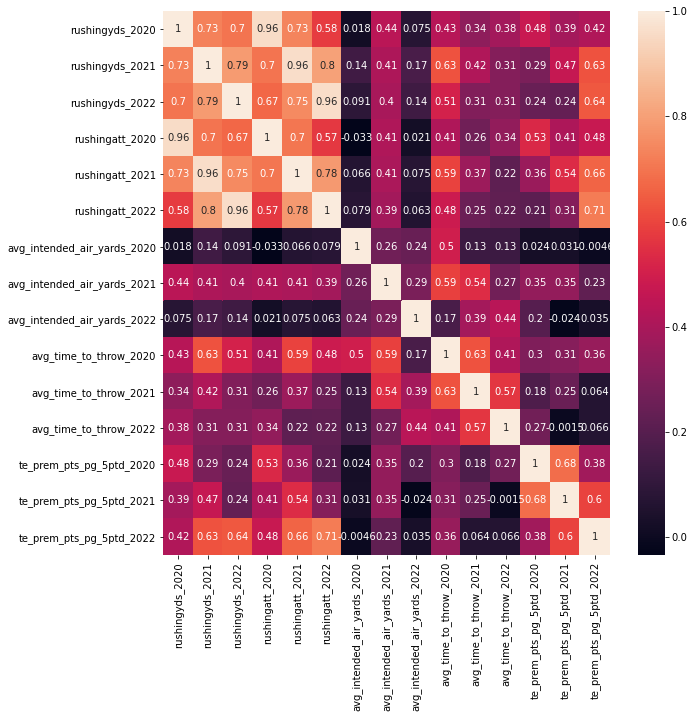

In [93]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['rushingyds_2020', 'rushingyds_2021', 'rushingyds_2022',
                     'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                   'avg_intended_air_yards_2020', 'avg_intended_air_yards_2021',
                   'avg_intended_air_yards_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

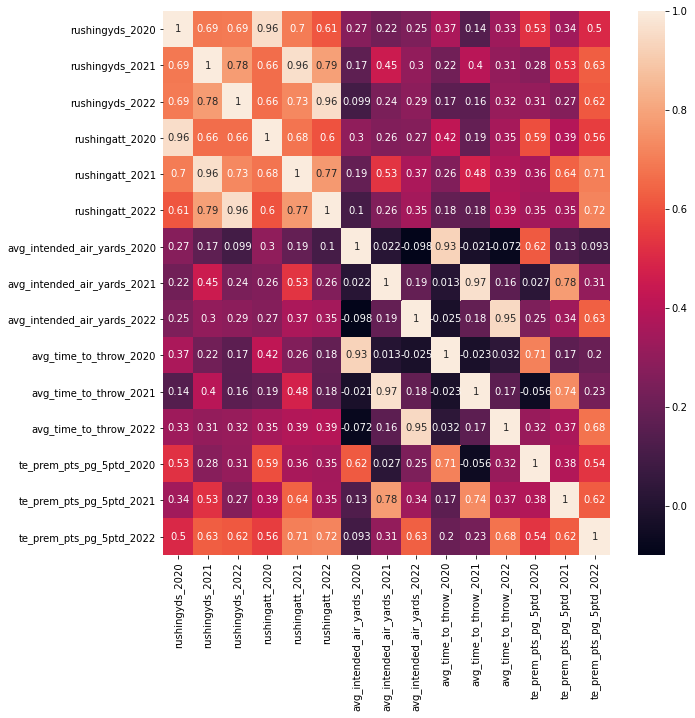

In [28]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['rushingyds_2020', 'rushingyds_2021', 'rushingyds_2022',
                     'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                   'avg_intended_air_yards_2020', 'avg_intended_air_yards_2021',
                   'avg_intended_air_yards_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

For QBs, past success seems to be indicitive of future success - even scores from 3 years ago all give a moderately high correlation to points (.64 for 2019 to 2022, .66 for 2020 to 2022, and .72 for the following year). Opportunities and points per game all are fairly high. Also, stats like rushing yards, as expected, have a moderate to strong correlation with points, even year over year for following years. Interestingly, though, attempts has a higher correlation with points. Intended air yards definitely have an impact in-year on points, but not as strong year over year. Same with time to throw.

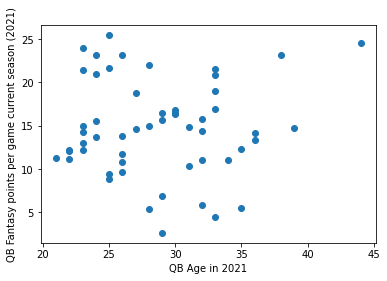

In [94]:
plt.scatter(qb_filtered['age_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Age in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()


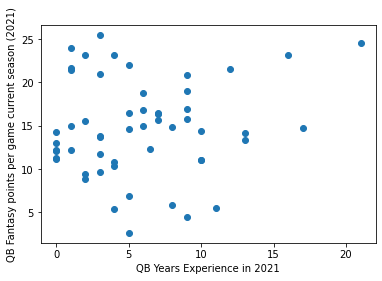

In [95]:
plt.scatter(qb_filtered['years_exp_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Years Experience in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()

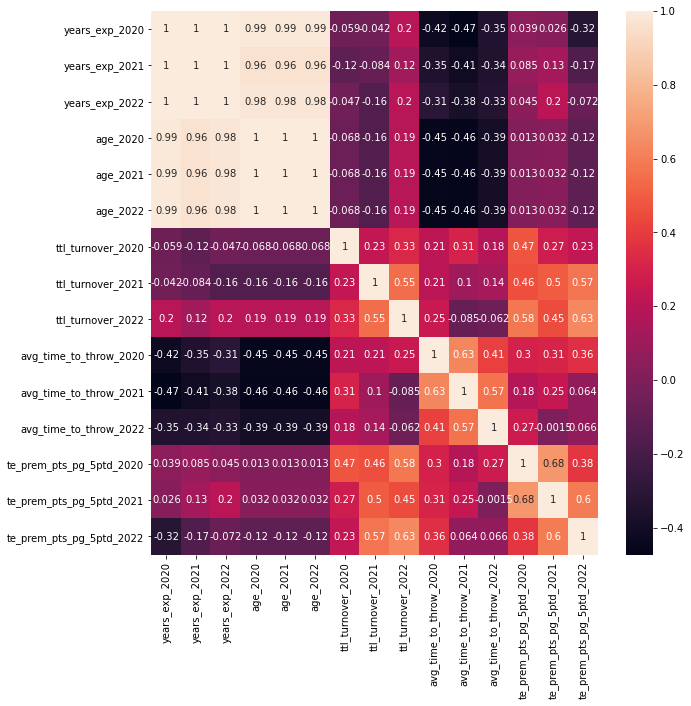

In [96]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'ttl_turnover_2020', 'ttl_turnover_2021',
                   'ttl_turnover_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Seems age has a higher correlation on points scored than years experience. We'll use age for that measure. 

Average intended air yards is quite dependent on average time to throw. The more time to throw, the further the qbs throw. and thn the more fantasy points they score.


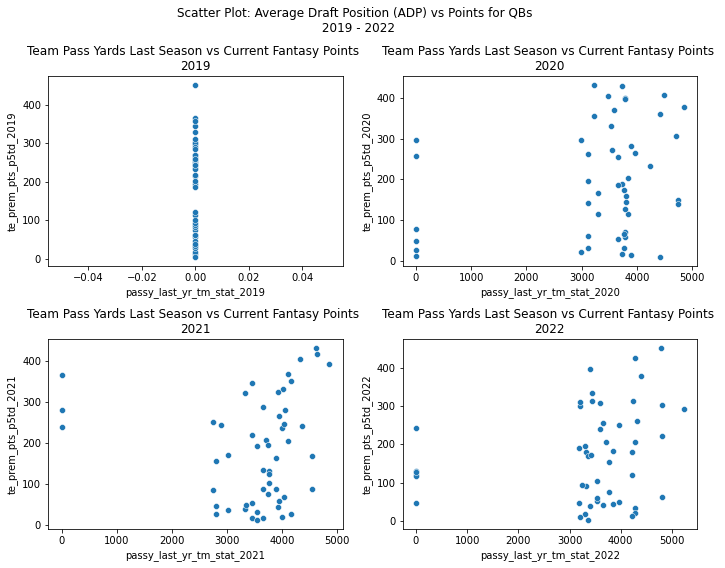

In [97]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for QBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'passy_last_yr_tm_stat_{year}', y=f'te_prem_pts_p5td_{year}',
                    data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Pass Yards Last Season vs Current Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

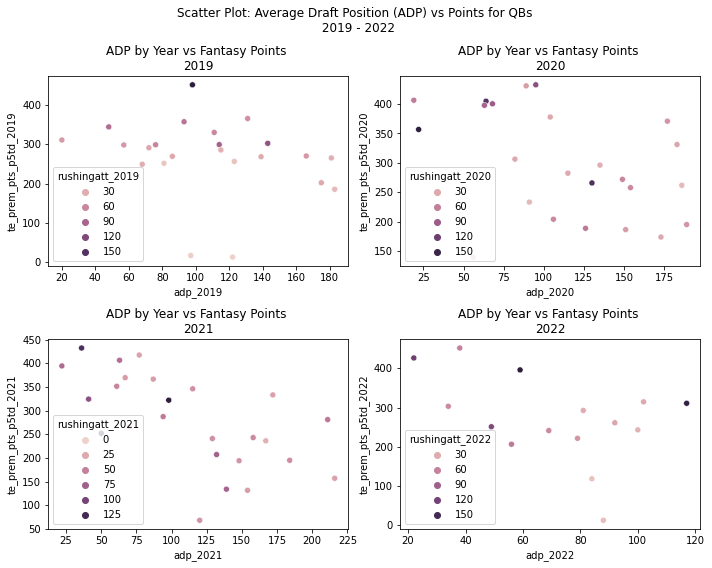

In [98]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for QBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'rushingatt_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

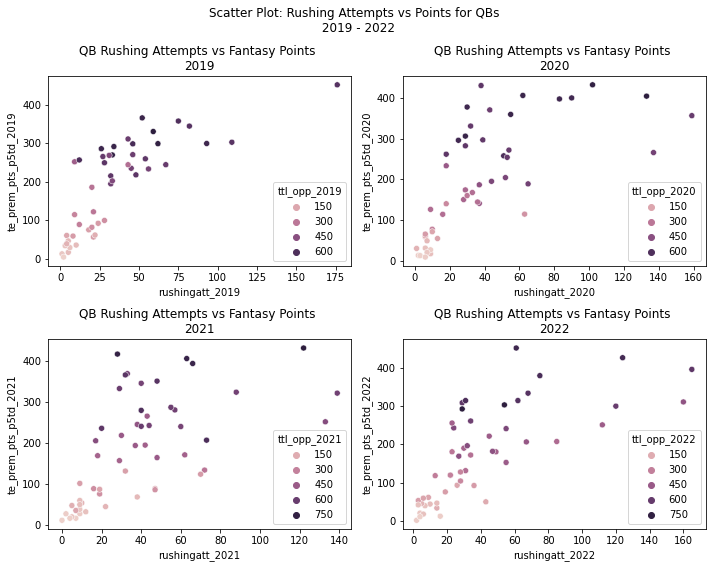

In [99]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Rushing Attempts vs Points for QBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'rushingatt_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'ttl_opp_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'QB Rushing Attempts vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

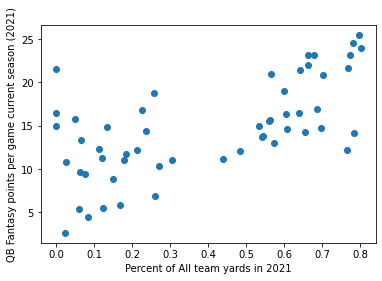

In [105]:
plt.scatter(qb_filtered['pct_team_yards_qb_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('Percent of All team yards in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

Next: either more visualizations, or try to start modeling for QBs. Perhaps visualizations while transforming data if necessary.

# RB

### cleaning/filtering some data

In [106]:
rb_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                              
A.J. Dillon            NaN      358.0      375.0      334.0        0.0   
Aaron Jones          320.0      358.0      375.0      334.0        0.0   
Aaron Shampklin        NaN        NaN        NaN        NaN        0.0   
Adam Prentice          NaN        NaN        NaN        NaN        0.0   
Adrian Peterson        0.0      350.0      302.0        NaN        NaN   

                 adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  age_2019  \
player_name                                                                   
A.J. Dillon           NaN     129.0      82.0      46.0       0.0       NaN   
Aaron Jones          28.0      18.0       6.0      16.0       0.0      25.0   
Aaron Shampklin       NaN       NaN       NaN       NaN       0.0       NaN   
Adam Prentice         NaN       NaN       NaN       NaN       0.0       NaN   
Adrian Peterson     105.0     116.0       NaN       NaN       NaN      34.0   

                 age_2020  age_2021  age_2022  age_2023  avg_cushion_2019  \
player_name                                                                 
A.J. Dillon           NaN       NaN       NaN       NaN               NaN   
Aaron Jones          26.0      27.0      28.0      29.0               0.0   
Aaron Shampklin       NaN       NaN       NaN       NaN               NaN   
Adam Prentice         NaN       NaN       NaN       NaN               NaN   
Adrian Peterson      35.0      36.0      37.0      38.0               0.0   

                 avg_cushion_2020  avg_cushion_2021  avg_cushion_2022  \
player_name                                                             
A.J. Dillon                   0.0               0.0               0.0   
Aaron Jones                   0.0               0.0               0.0   
Aaron Shampklin               NaN               NaN               NaN   
Adam Prentice                 NaN               NaN               NaN   
Adrian Peterson               0.0               0.0               NaN   

                 avg_cushion_2023  avg_expected_yac_2019  \
player_name                                                
A.J. Dillon                   0.0                    NaN   
Aaron Jones                   0.0                    0.0   
Aaron Shampklin               0.0                    NaN   
Adam Prentice                 0.0                    NaN   
Adrian Peterson               NaN                    0.0   

                 avg_expected_yac_2020  avg_expected_yac_2021  \
player_name                                                     
A.J. Dillon                        0.0                    0.0   
Aaron Jones                        0.0                    0.0   
Aaron Shampklin                    NaN                    NaN   
Adam Prentice                      NaN                    NaN   
Adrian Peterson                    0.0                    0.0   

                 avg_expected_yac_2022  avg_expected_yac_2023  \
player_name                                                     
A.J. Dillon                        0.0                    0.0   
Aaron Jones                        0.0                    0.0   
Aaron Shampklin                    NaN                    0.0   
Adam Prentice                      NaN                    0.0   
Adrian Peterson                    NaN                    NaN   

                 avg_intended_air_yards_2019  avg_intended_air_yards_2020  \
player_name                                                                 
A.J. Dillon                              NaN                          0.0   
Aaron Jones                              0.0                          0.0   
Aaron Shampklin                          NaN                          NaN   
Adam Prentice                            NaN                          NaN   
Adrian Peterson                          0.0                          0.0   

                 av

In [107]:
rb_wide.shape

(285, 565)

In [108]:
rb_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    202
te_prem_pts_p5td_2020    186
te_prem_pts_p5td_2021    195
te_prem_pts_p5td_2022    203
dtype: int64

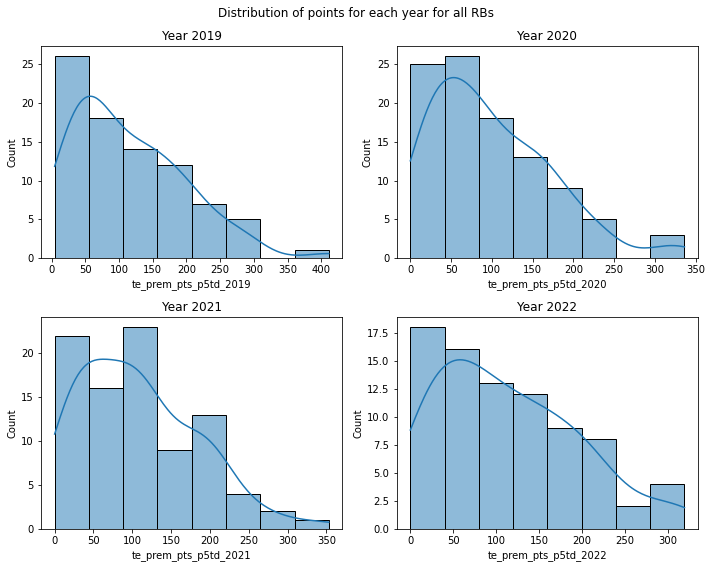

In [135]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of points for each year for all RBs')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb_wide[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [137]:
# can we cut this data down to a relevant top percentile?
# utilizing nulls like we did with QBs, perhaps the top 50-60% can be kept

rb_wide[scoring_by_year].quantile([ .2, .3, .4, .5, .6, .6667, .7,])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.2000               44.44000               32.30000               36.84000   
0.3000               54.38000               49.24000               52.52000   
0.4000               75.70000               67.22000               74.80000   
0.5000               93.80000               82.90000               97.80000   
0.6000              126.24000              104.96000              112.42000   
0.6667              144.48416              124.00294              128.60445   
0.7000              153.64000              131.20000              136.61000   

        te_prem_pts_p5td_2022  
0.2000               37.90000  
0.3000               58.16000  
0.4000               78.34000  
0.5000              100.55000  
0.6000              127.70000  
0.6667              142.91755  
0.7000              152.38000

In [138]:
# let's filter out QBs a bit further
# cut it about the top 3rd, or 66.7th percentile
# rb must register a season in the top 3rd of the league to be in final dataset

rb_filtered = rb_wide.loc[(rb_wide['te_prem_pts_p5td_2019'] >= rb_wide[scoring_by_year].quantile(.25)[0] )|
                          (rb_wide['te_prem_pts_p5td_2020'] >= rb_wide[scoring_by_year].quantile(.25)[1]) |
                          (rb_wide['te_prem_pts_p5td_2021'] >= rb_wide[scoring_by_year].quantile(.25)[2]) |  
                          (rb_wide['te_prem_pts_p5td_2022'] >= rb_wide[scoring_by_year].quantile(.25)[3]) ] 

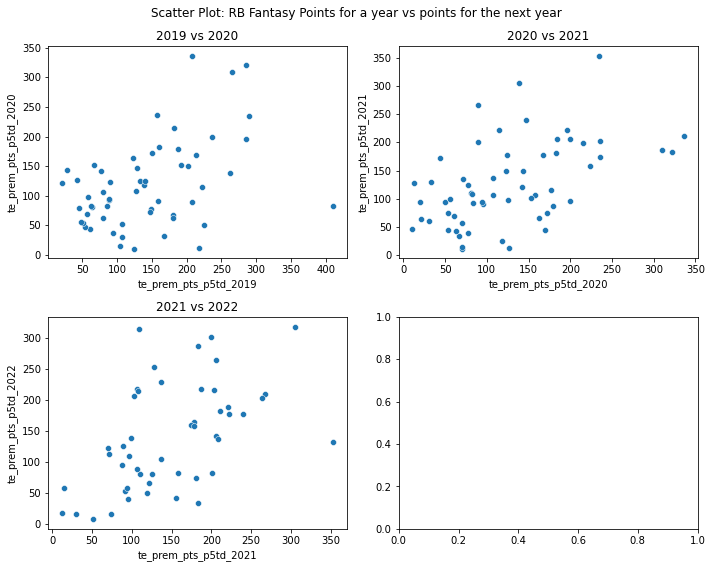

In [139]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: RB Fantasy Points for a year vs points for the next year')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

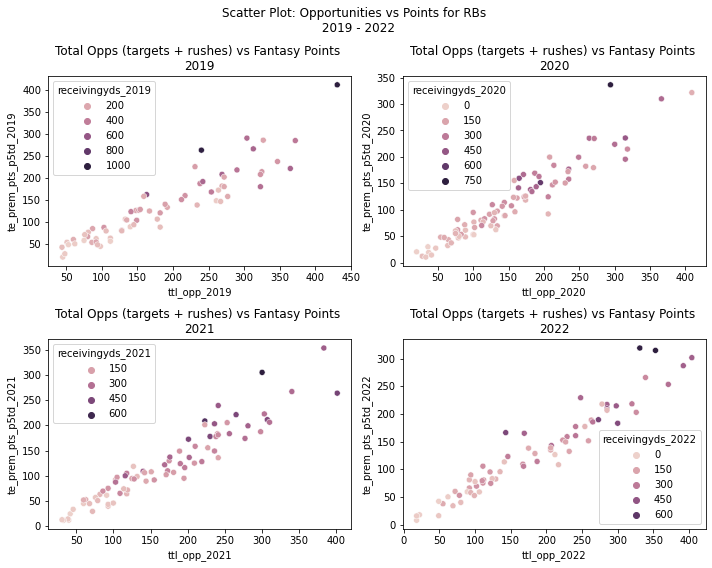

In [140]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Opps (targets + rushes) vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

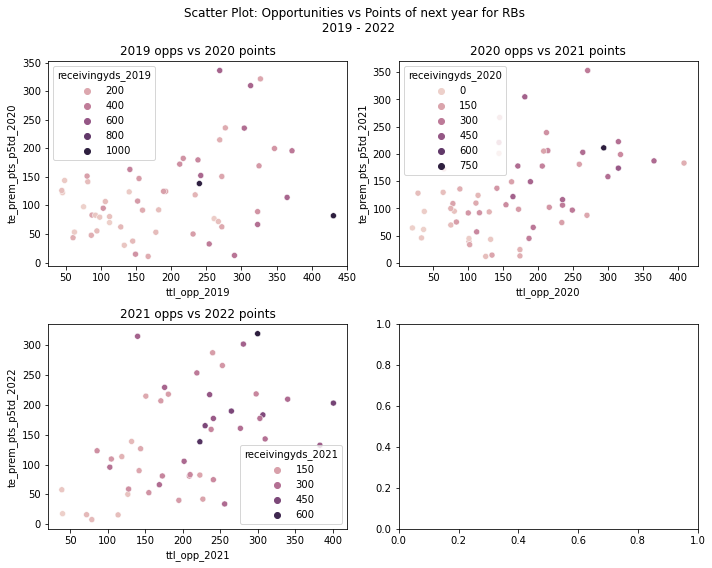

In [141]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points of next year for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{next_year}', hue = f'receivingyds_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} opps vs {next_year} points')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

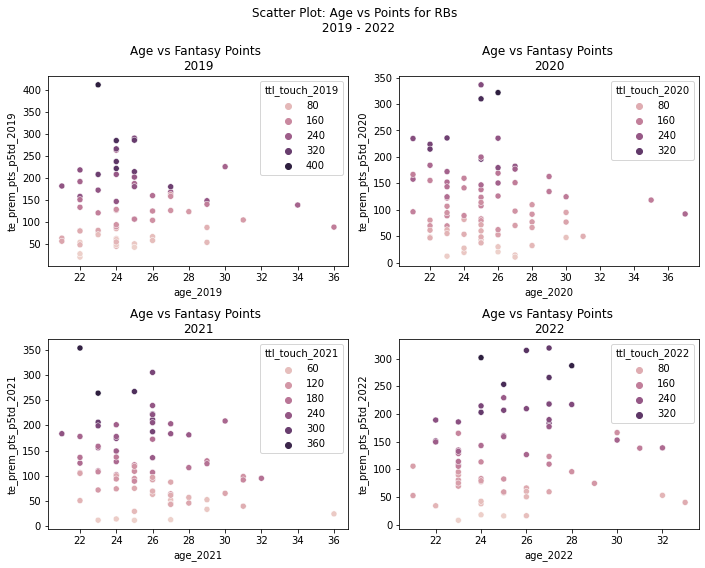

In [142]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Age vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'age_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'ttl_touch_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Age vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

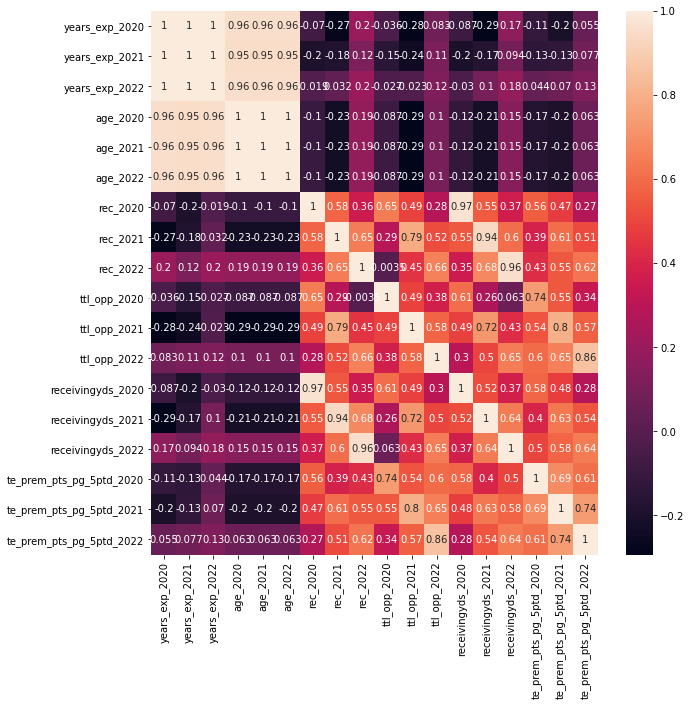

In [143]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_filtered[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'rec_2020', 'rec_2021',
                   'rec_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'receivingyds_2020', 'receivingyds_2021',
                     'receivingyds_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Past year scoring has a high correlation (.75 - .8) with following years. Tll opportunities seem to more as well, and more than receptions. Age doesn't but perhaps that can change when filtering out a few more. Age seems to have more, though, than years experience.

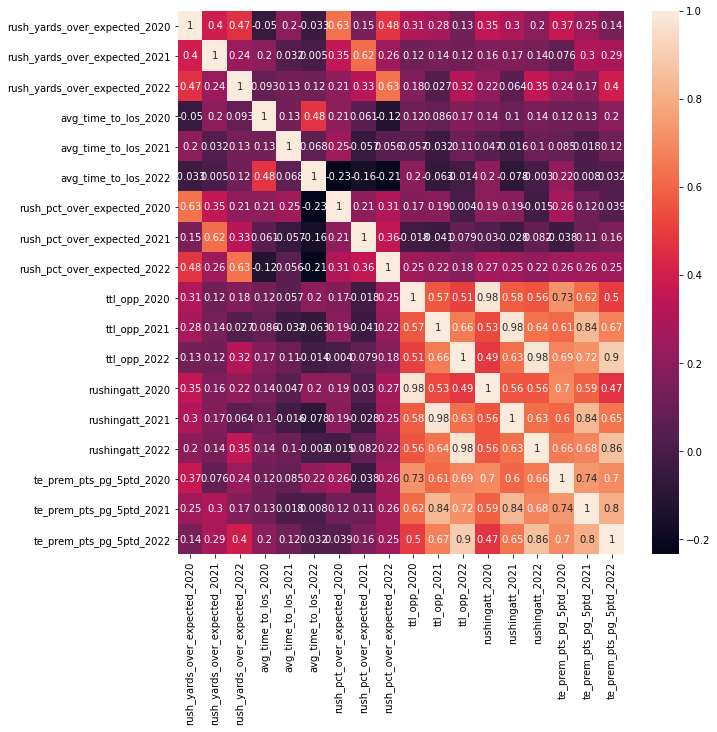

In [144]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_wide[['rush_yards_over_expected_2020', 'rush_yards_over_expected_2021', 'rush_yards_over_expected_2022',
                     'avg_time_to_los_2020', 'avg_time_to_los_2021', 'avg_time_to_los_2022',
                   'rush_pct_over_expected_2020', 'rush_pct_over_expected_2021',
                   'rush_pct_over_expected_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                     'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

AVG_time_to_los and rush_pct over expected each have moderate correlations with points. We're going to use rush_pct_over_expected

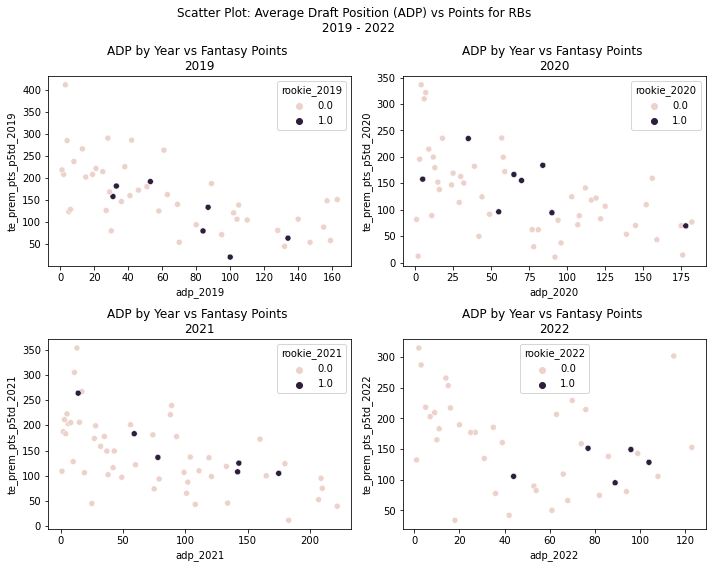

In [145]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'rookie_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2021)')

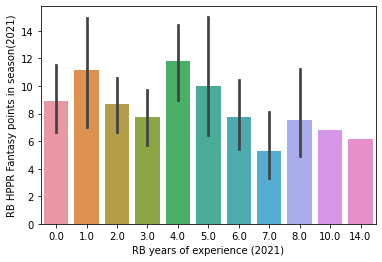

In [146]:
sns.barplot(rb_filtered['years_exp_2021'], rb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('RB years of experience (2021)')
plt.ylabel('RB HPPR Fantasy points in season(2021)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2020)')

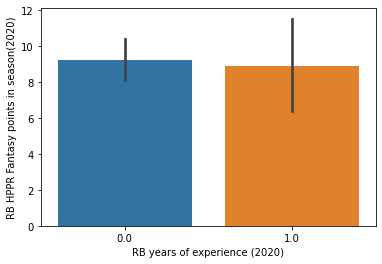

In [147]:
sns.barplot(rb_filtered['rookie_2021'], rb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB HPPR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2022)')

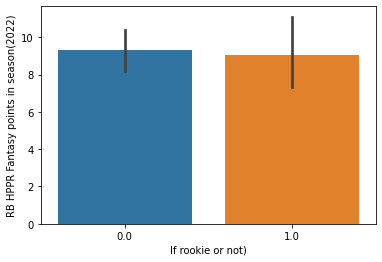

In [148]:
sns.barplot(rb_filtered['rookie_2022'], rb_filtered['te_prem_pts_pg_5ptd_2022'])
plt.xlabel('If rookie or not)')
plt.ylabel('RB HPPR Fantasy points in season(2022)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2022)')

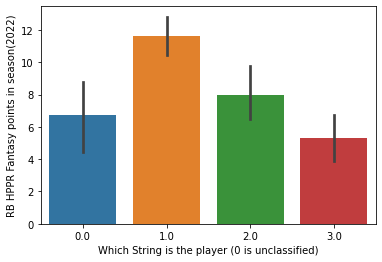

In [151]:


sns.barplot(rb_filtered['depth_team_2022'], rb_filtered['te_prem_pts_pg_5ptd_2022'])
plt.xlabel('Which String is the player (0 is unclassified)')
plt.ylabel('RB HPPR Fantasy points in season(2022)')

### RBs Fantasy Performance and Next Gen Stats

Some columns that will have interest are:

    expected_rush_yards, avg_rush_yards, rush_yards_over_expected_per_att, rush_pct_over_expected_20, avg_time_to_los, efficiency
   

### WR

In [152]:
wr_wide.describe()

1std_2019   1std_2020   1std_2021   1std_2022  1std_2023    adp_2019  \
count  155.000000  155.000000  159.000000  142.000000      424.0   60.000000   
mean   294.800000  317.787097  312.937107  320.323944        0.0   84.116667   
std    101.205359  100.825037  104.007162   75.453104        0.0   49.900950   
min      0.000000    0.000000    0.000000    0.000000        0.0    9.000000   
25%    305.000000  318.000000  306.500000  300.000000        0.0   43.750000   
50%    317.000000  350.000000  331.000000  342.000000        0.0   79.500000   
75%    346.000000  366.500000  364.500000  352.000000        0.0  122.250000   
max    386.000000  397.000000  419.000000  408.000000        0.0  188.000000   

         adp_2020    adp_2021    adp_2022  adp_2023    age_2019    age_2020  \
count   64.000000   65.000000   44.000000     424.0  271.000000  271.000000   
mean    91.500000  101.061538   59.386364       0.0   24.088561   25.081181   
std     53.182823   60.648804   33.574780       0.0    3.308728    3.308918   
min      8.000000    7.000000    4.000000       0.0   18.000000   19.000000   
25%     46.750000   48.000000   29.750000       0.0   22.000000   23.000000   
50%     85.000000   96.000000   57.500000       0.0   24.000000   25.000000   
75%    132.250000  145.000000   88.000000       0.0   26.000000   27.000000   
max    195.000000  219.000000  114.000000       0.0   36.000000   37.000000   

         age_2021    age_2022    age_2023  aggressiveness_2019  \
count  271.000000  271.000000  271.000000                155.0   
mean    26.081181   27.081181   28.081181                  0.0   
std      3.308918    3.308918    3.308918                  0.0   
min     20.000000   21.000000   22.000000                  0.0   
25%     24.000000   25.000000   26.000000                  0.0   
50%     26.000000   27.000000   28.000000                  0.0   
75%     28.000000   29.000000   30.000000                  0.0   
max     38.000000   39.000000   40.000000                  0.0   

       aggressiveness_2020  aggressiveness_2021  aggressiveness_2022  \
count           155.000000                159.0                142.0   
mean              0.113097                  0.0                  0.0   
std               1.408049                  0.0                  0.0   
min               0.000000                  0.0                  0.0   
25%               0.000000                  0.0                  0.0   
50%               0.000000                  0.0                  0.0   
75%               0.000000                  0.0                  0.0   
max              17.530073                  0.0                  0.0   

       aggressiveness_2023  attempts_2019  attempts_2020  attempts_2021  \
count                424.0          155.0     155.000000          159.0   
mean                   0.0            0.0       0.183871            0.0   
std                    0.0            0.0       2.289175            0.0   
min                    0.0            0.0       0.000000            0.0   
25%                    0.0            0.0       0.000000            0.0   
50%                    0.0            0.0       0.000000            0.0   
75%                    0.0            0.0       0.000000            0.0   
max                    0.0            0.0      28.500000            0.0   

       attempts_2022  attempts_2023  avg_air_distance_2019  \
count          142.0          424.0                  155.0   
mean             0.0            0.0                    0.0   
std              0.0            0.0                    0.0   
min              0.0            0.0                    0.0   
25%              0.0            0.0                    0.0   
50%              0.0            0.0                    0.0   
75%              0.0            0.0                    0.0   
max              0.0            0.0                    0.0   

       avg_air_distance_2020  avg_air_distance_2021  avg_air_distance_2022  \
count             

In [153]:
wr_wide.shape

(506, 605)

In [155]:
wr_wide[scoring_by_year].isna().sum()

te_prem_pts_p5td_2019    351
te_prem_pts_p5td_2020    351
te_prem_pts_p5td_2021    347
te_prem_pts_p5td_2022    364
dtype: int64

We can probably get rid of 1/3 to 50% of the top wrs, using a similar method as before. First, let's see the distribution of scoring for all WRs.

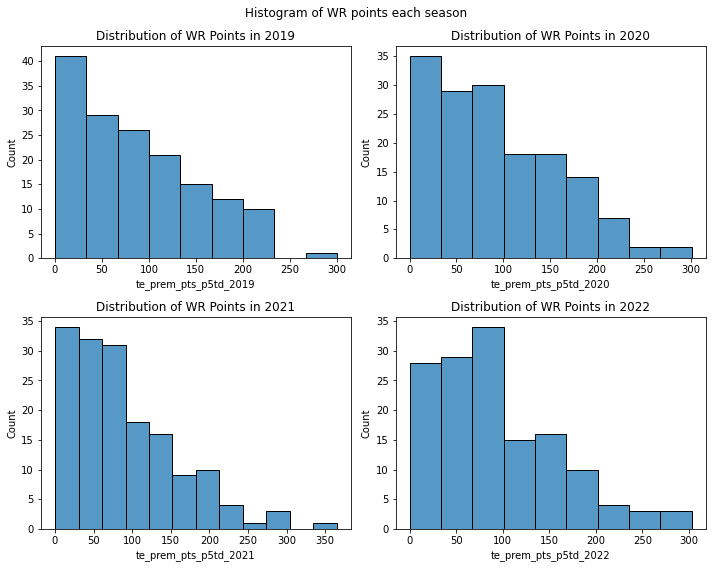

In [156]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of WR points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= wr_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of WR Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [157]:
wr_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([.1, .2, .3, .4, .5, .6, .63, .6667, .7])



te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.1000                 7.2600               12.72000               18.02000   
0.2000                28.8400               29.59200               28.12000   
0.3000                35.6800               44.58400               45.98000   
0.4000                50.2200               63.82000               58.98000   
0.5000                71.1000               80.30000               70.60000   
0.6000                94.0000               98.82000               87.54000   
0.6300               100.5040              103.62000               92.60800   
0.6667               110.1718              119.53436              107.54018   
0.7000               118.3200              126.48000              112.42000   

        te_prem_pts_p5td_2022  
0.1000                17.4700  
0.2000                35.1200  
0.3000                50.7200  
0.4000                67.1000  
0.5000                80.9500  
0.6000                91.4000  
0.6300                95.7260  
0.6667               111.1282  
0.7000               124.6700

Let's take the top 3rd -- they must have finished in the top 3rd at least one of these seasons.

In [158]:
wr_filtered = wr_wide.loc[(wr_wide['te_prem_pts_p5td_2019'] >= wr_wide[scoring_by_year].quantile(.33)[0] )|
                          (wr_wide['te_prem_pts_p5td_2020'] >= wr_wide[scoring_by_year].quantile(.33)[1]) |
                          (wr_wide['te_prem_pts_p5td_2021'] >= wr_wide[scoring_by_year].quantile(.33)[2]) |  
                          (wr_wide['te_prem_pts_p5td_2022'] >= wr_wide[scoring_by_year].quantile(.33)[3]) ] 

print('nulls of wr_filtered now: ', 
      wr_filtered[scoring_by_year].isna().sum(),
     'Shape of wr_filtered: ',
     wr_filtered.shape)

nulls of wr_filtered now:  te_prem_pts_p5td_2019    68
te_prem_pts_p5td_2020    59
te_prem_pts_p5td_2021    52
te_prem_pts_p5td_2022    71
dtype: int64 Shape of wr_filtered:  (186, 605)


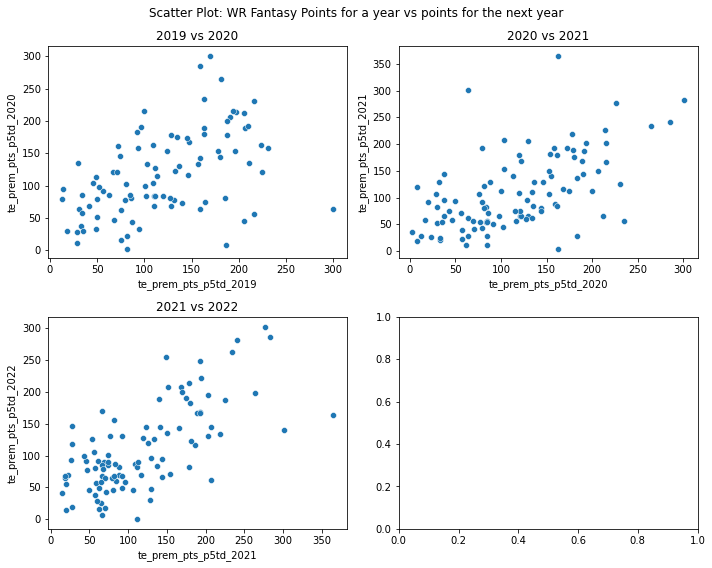

In [159]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: WR Fantasy Points for a year vs points for the next year')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

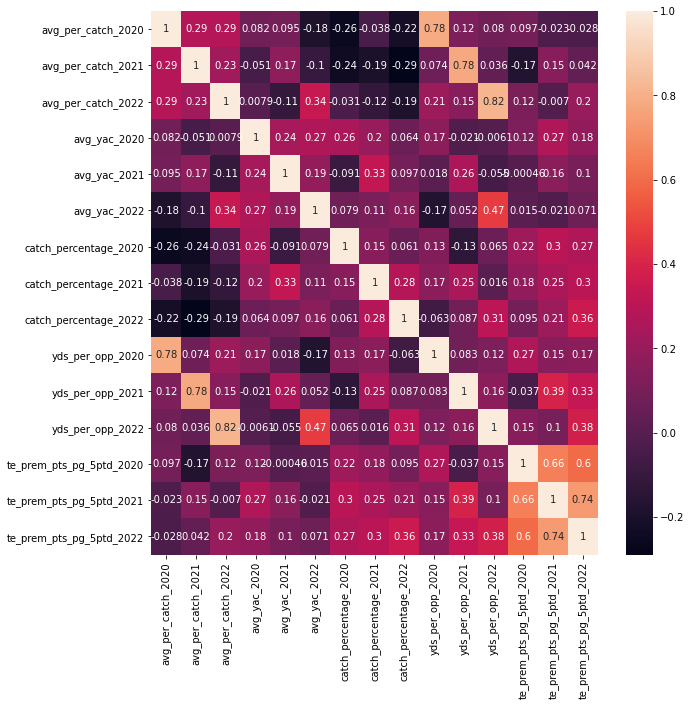

In [161]:
# let's look some possibly interesting figures for WRs
# many next gen stats

plt.figure(figsize = (10,10))

sns.heatmap(wr_filtered[['avg_per_catch_2020', 'avg_per_catch_2021', 'avg_per_catch_2022',
                     'avg_yac_2020', 'avg_yac_2021', 'avg_yac_2022',
                   'catch_percentage_2020', 'catch_percentage_2021',
                   'catch_percentage_2022', 'yds_per_opp_2020' , 'yds_per_opp_2021', 
                   'yds_per_opp_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

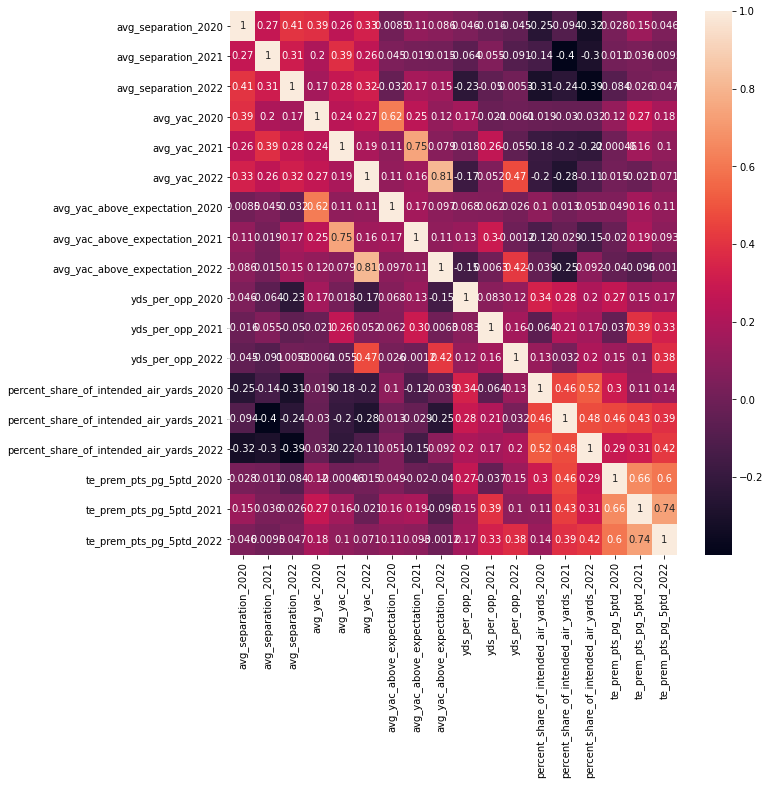

In [162]:
# let's look some possibly interesting figures for WRs
# many next gen stats

plt.figure(figsize = (10,10))

sns.heatmap(wr_filtered[['avg_separation_2020', 'avg_separation_2021', 'avg_separation_2022',
                     'avg_yac_2020', 'avg_yac_2021', 'avg_yac_2022',
                   'avg_yac_above_expectation_2020', 'avg_yac_above_expectation_2021',
                   'avg_yac_above_expectation_2022', 'yds_per_opp_2020' , 'yds_per_opp_2021', 
                   'yds_per_opp_2022', 'percent_share_of_intended_air_yards_2020', 
                  'percent_share_of_intended_air_yards_2021', 'percent_share_of_intended_air_yards_2022',
                         'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021',
                         'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()


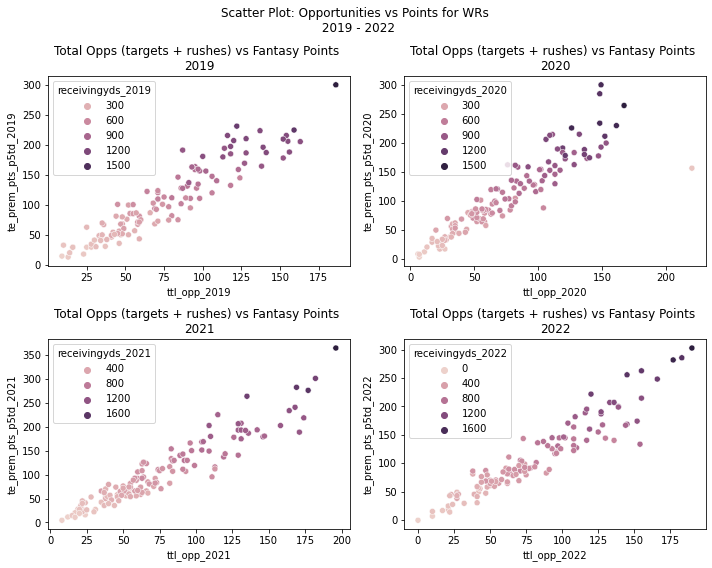

In [163]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Opps (targets + rushes) vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

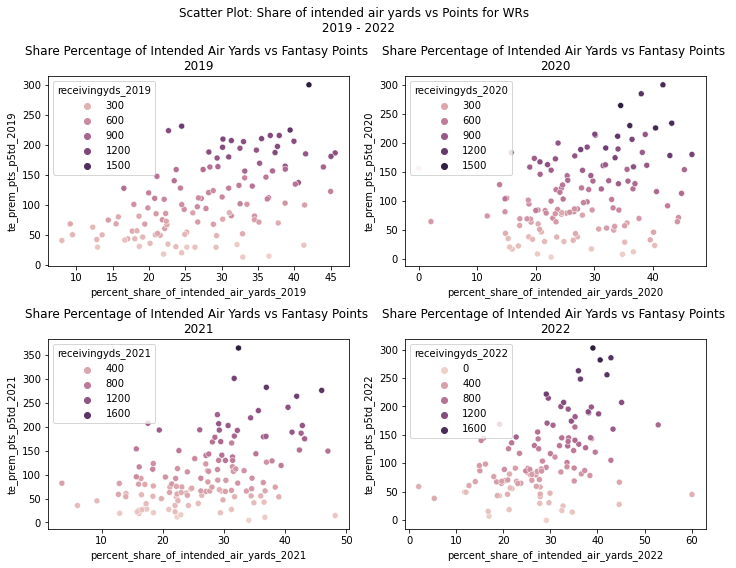

In [164]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Share of intended air yards vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'percent_share_of_intended_air_yards_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Share Percentage of Intended Air Yards vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

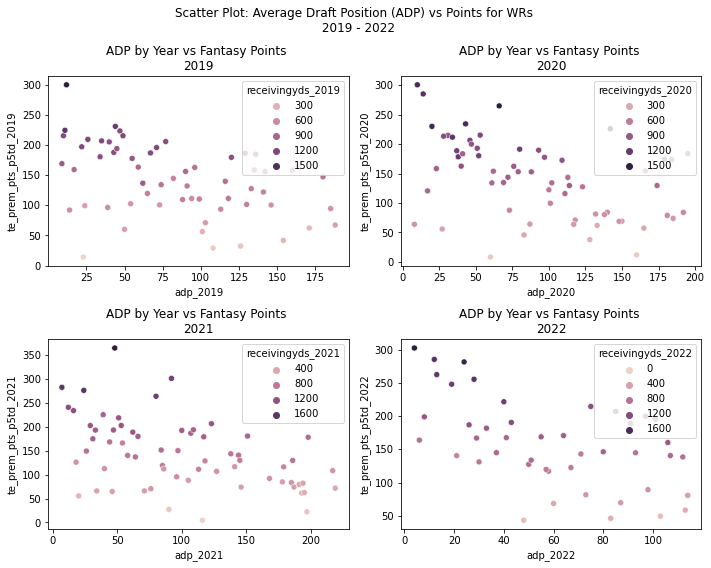

In [165]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'WR Fantasy points in season(2021)')

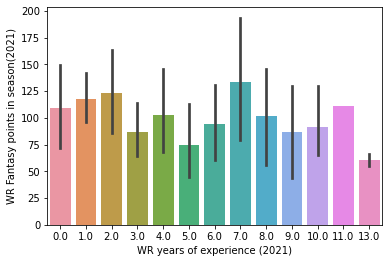

In [166]:
sns.barplot( data = wr_filtered, x = 'years_exp_2021', y = 'te_prem_pts_p5td_2021')
plt.xlabel('WR years of experience (2021)')
plt.ylabel('WR Fantasy points in season(2021)')

Text(0, 0.5, 'WR Fantasy points in season(2022)')

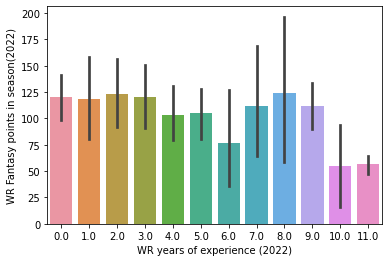

In [167]:
sns.barplot( data = wr_filtered, x = 'years_exp_2022', y = 'te_prem_pts_p5td_2022')
plt.xlabel('WR years of experience (2022)')
plt.ylabel('WR Fantasy points in season(2022)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy Average total points in season(2022)')

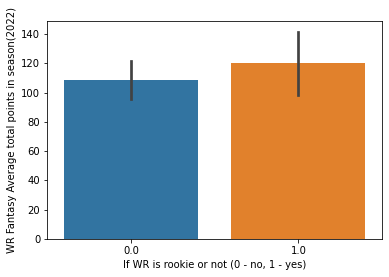

In [168]:
sns.barplot(wr_filtered['rookie_2022'], wr_filtered['te_prem_pts_p5td_2022'] )
plt.xlabel('If WR is rookie or not (0 - no, 1 - yes)')
plt.ylabel('WR Fantasy Average total points in season(2022)')

### TE

In [169]:
te_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                                 
Adam Shaheen              NaN        NaN      325.0        NaN        0.0   
Adam Trautman             NaN        NaN      307.0        NaN        0.0   
Albert Okwuegbunam        NaN      308.0      331.0      300.0        0.0   
Alize Mack                NaN        NaN        NaN        NaN        0.0   
Andrew Beck               NaN        NaN        NaN        NaN        0.0   

                    adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  \
player_name                                                            
Adam Shaheen             NaN       NaN       NaN       NaN       0.0   
Adam Trautman            NaN       NaN     173.0       NaN       0.0   
Albert Okwuegbunam       NaN       NaN       NaN       NaN       0.0   
Alize Mack               NaN       NaN       NaN       NaN       0.0   
Andrew Beck              NaN       NaN       NaN       NaN       0.0   

                    age_2019  age_2020  age_2021  age_2022  age_2023  \
player_name                                                            
Adam Shaheen            25.0      26.0      27.0      28.0      29.0   
Adam Trautman           22.0      23.0      24.0      25.0      26.0   
Albert Okwuegbunam      21.0      22.0      23.0      24.0      25.0   
Alize Mack               NaN       NaN       NaN       NaN       NaN   
Andrew Beck              NaN       NaN       NaN       NaN       NaN   

                    avg_cushion_2019  avg_cushion_2020  avg_cushion_2021  \
player_name                                                                
Adam Shaheen                     NaN               NaN          3.196667   
Adam Trautman                    NaN               NaN          6.032467   
Albert Okwuegbunam               NaN          7.725667          6.296250   
Alize Mack                       NaN               NaN               NaN   
Andrew Beck                      NaN               NaN               NaN   

                    avg_cushion_2022  avg_cushion_2023  avg_expected_yac_2019  \
player_name                                                                     
Adam Shaheen                     NaN               0.0                    NaN   
Adam Trautman                    NaN               0.0                    NaN   
Albert Okwuegbunam            4.5385               0.0                    NaN   
Alize Mack                       NaN               0.0                    NaN   
Andrew Beck                      NaN               0.0                    NaN   

                    avg_expected_yac_2020  avg_expected_yac_2021  \
player_name                                                        
Adam Shaheen                          NaN               2.719246   
Adam Trautman                         NaN               4.545758   
Albert Okwuegbunam               7.474475               4.449491   
Alize Mack                            NaN                    NaN   
Andrew Beck                           NaN                    NaN   

                    avg_expected_yac_2022  avg_expected_yac_2023  \
player_name                                                        
Adam Shaheen                          NaN                    0.0   
Adam Trautman                         NaN                    0.0   
Albert Okwuegbunam               5.131349                    0.0   
Alize Mack                            NaN                    0.0   
Andrew Beck                           NaN                    0.0   

                    avg_intended_air_yards_2019  avg_intended_air_yards_2020  \
player_name                                                                    
Adam Shaheen                                NaN                          NaN   
Adam Trautman                               NaN                          NaN   
Albert Okwuegbunam                          NaN                     9.566071   
Alize Mack     

In [69]:
te_wide.shape

(332, 480)

In [170]:
te_wide[scoring_by_year].isna().sum()

te_prem_pts_p5td_2019    186
te_prem_pts_p5td_2020    187
te_prem_pts_p5td_2021    184
te_prem_pts_p5td_2022    184
dtype: int64

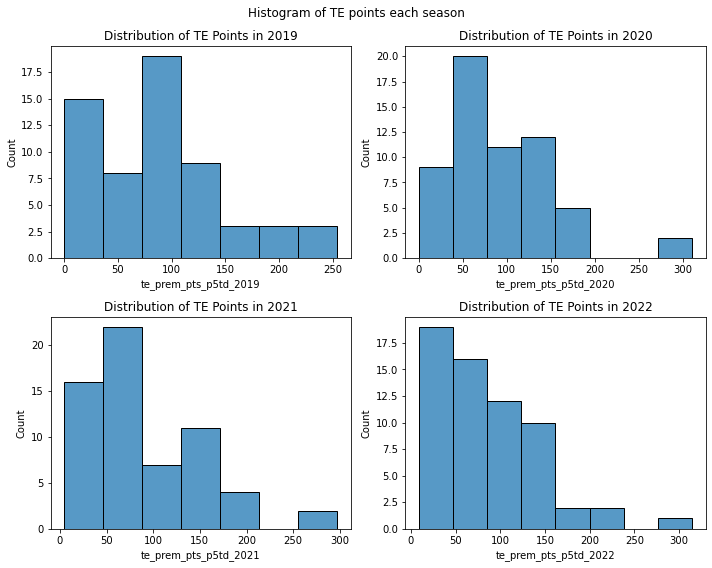

In [171]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of TE points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= te_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of TE Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [173]:
# can we cut this data down to a relevant top percentile?

te_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .2, .3, .4, .5, .6, .67,.7, .75, .8])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.20                 33.420                 43.560                 38.340   
0.30                 50.540                 61.380                 51.850   
0.40                 74.620                 67.080                 62.220   
0.50                 82.100                 78.900                 71.550   
0.60                 89.800                 91.060                 83.020   
0.67                102.767                115.994                116.474   
0.70                106.110                125.760                126.170   
0.75                111.175                140.000                137.100   
0.80                126.160                144.280                149.160   

      te_prem_pts_p5td_2022  
0.20                 36.580  
0.30                 43.220  
0.40                 58.200  
0.50                 74.900  
0.60                 92.380  
0.67                103.159  
0.70                109.740  
0.75                120.575  
0.80                135.520

In [174]:
# to stay consistent, let's make the cutoff at top 3rd again

# let's filter out QBs a bit further

te_filtered = te_wide.loc[(te_wide['te_prem_pts_p5td_2019'] >= te_wide[scoring_by_year].quantile(.25)[0] )|
                          (te_wide['te_prem_pts_p5td_2020'] >= te_wide[scoring_by_year].quantile(.25)[1]) |
                          (te_wide['te_prem_pts_p5td_2021'] >= te_wide[scoring_by_year].quantile(.25)[2]) |  
                          (te_wide['te_prem_pts_p5td_2022'] >= te_wide[scoring_by_year].quantile(.25)[3]) ] 


print('nulls of te_filtered now: ', 
      te_filtered[scoring_by_year].isna().sum(),
     'Shape of te_filtered: ',
    te_filtered.shape)


nulls of te_filtered now:  te_prem_pts_p5td_2019    37
te_prem_pts_p5td_2020    32
te_prem_pts_p5td_2021    33
te_prem_pts_p5td_2022    33
dtype: int64 Shape of te_filtered:  (84, 530)


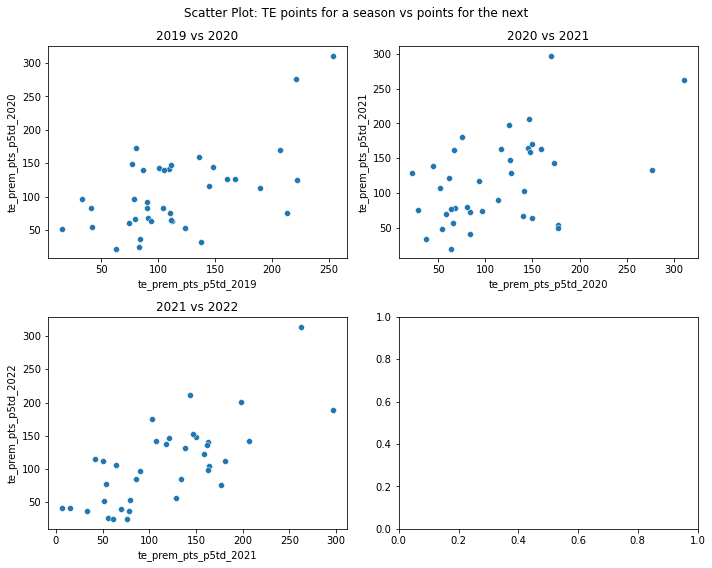

In [175]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: TE points for a season vs points for the next')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

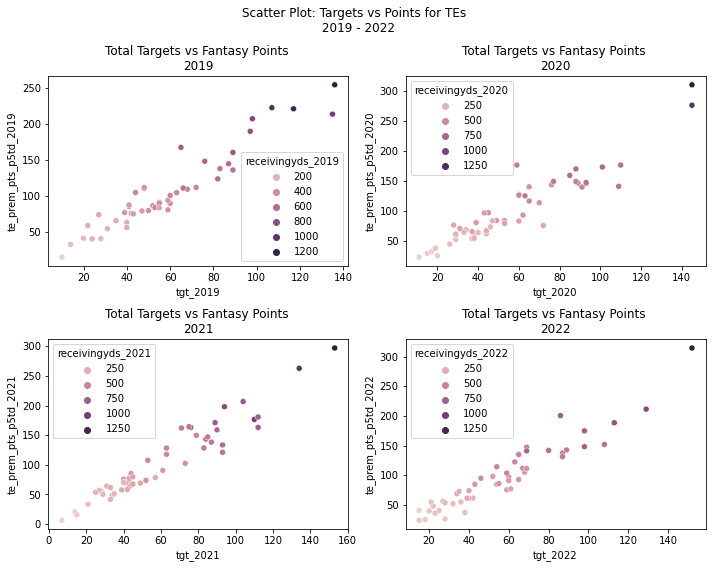

In [176]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Targets vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'tgt_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Targets vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

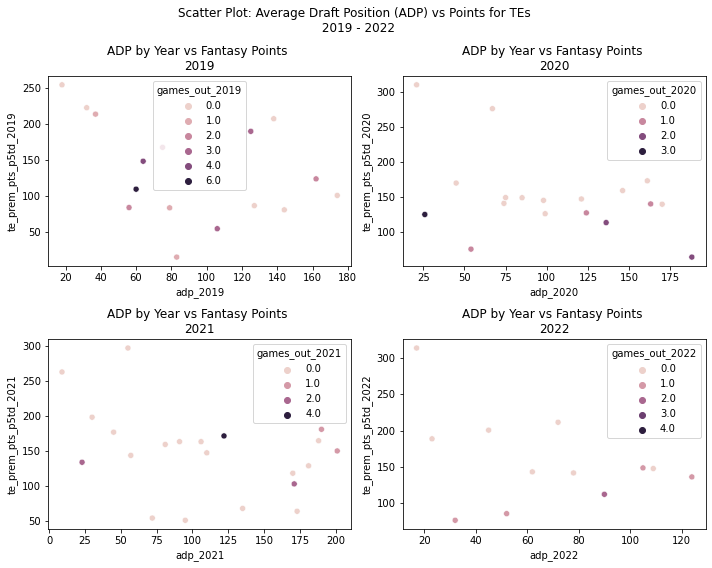

In [177]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'games_out_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

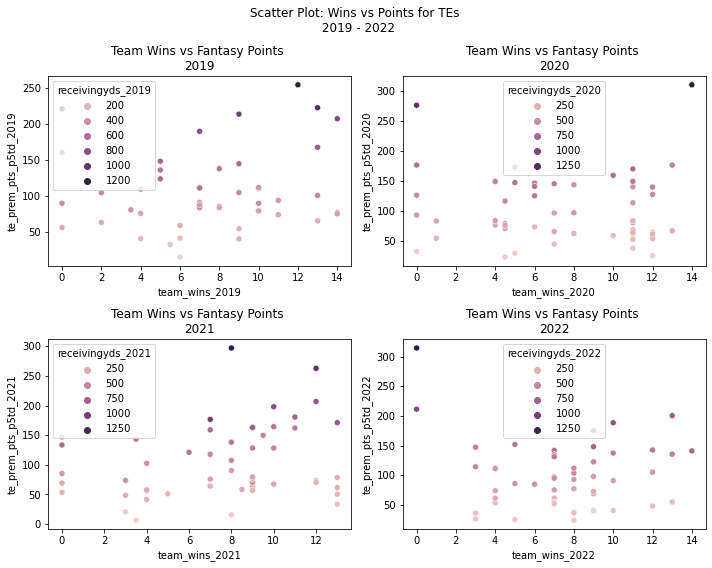

In [178]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Wins vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'team_wins_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Wins vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [179]:
### Saving DFs to do initial modeling on

qb_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide_filtered.csv")
rb_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide_filtered.csv")
wr_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide_filtered.csv")
te_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide_filtered.csv")